In [1]:
# Import required packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



In [2]:
whisky = pd.read_csv('whisky.csv')
whisky.tail(10)

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
76,77,Strathmill,2,3,1,0,0,0,2,0,2,1,3,2,AB55 5DQ,342650,850500
77,78,Talisker,4,2,3,3,0,1,3,0,1,2,2,0,IV47 8SR,137950,831770
78,79,Tamdhu,1,2,1,0,0,2,0,1,1,2,2,2,AB38 7RP,319210,841760
79,80,Tamnavulin,1,3,2,0,0,0,2,0,2,1,2,3,AB37 9JA,321180,826110
80,81,Teaninich,2,2,2,1,0,0,2,0,0,0,2,2,IV17 0XB,265360,869120
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850


In [9]:
whisky= whisky.drop(['Postcode', 'Distillery', 'Body', 'Latitude', 'Longitude'], axis=1)


In [3]:
whisky.dtypes

RowID          int64
Distillery    object
Body           int64
Sweetness      int64
Smoky          int64
Medicinal      int64
Tobacco        int64
Honey          int64
Spicy          int64
Winey          int64
Nutty          int64
Malty          int64
Fruity         int64
Floral         int64
Postcode      object
Latitude       int64
Longitude      int64
dtype: object

In [10]:
from sklearn.decomposition import KernelPCA
np.random.seed(42)
rbf_pca= KernelPCA(n_components=2, kernel='rbf')
X_reduced= rbf_pca.fit_transform(whisky)

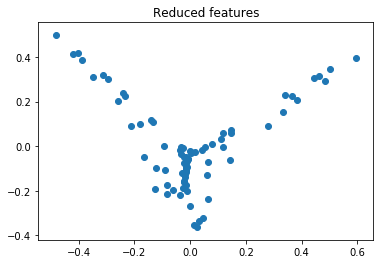

In [11]:
x=X_reduced[:,0]
y=X_reduced[:,1]

plt.scatter(x, y)
plt.title('Reduced features')
plt.show()

In [12]:
X = whisky.iloc[:,:-3].values  #Assigning features to X to train these features

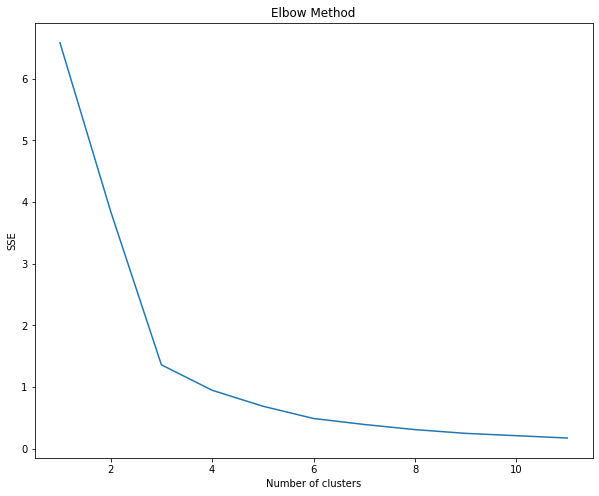

In [13]:
from sklearn.cluster import KMeans

sse=[]
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced)
    sse.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 12), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [14]:
kmeans= KMeans(n_clusters=3, random_state=42)
y_preds= kmeans.fit_predict(X_reduced)

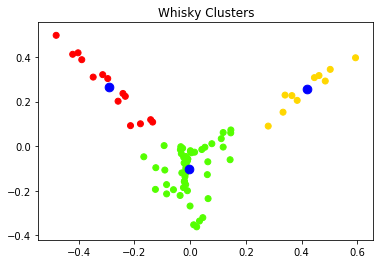

In [15]:
plt.scatter(x, y, c=y_preds, cmap='prism')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', marker='.')
plt.title('Whisky Clusters')
plt.show()

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Classification report for Whiskey distillery:\n",classification_report(y_preds, kmeans.labels_))

Classification report for Whiskey distillery:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        62

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

